## About The Project
This project analyses data about volcanos as they connected to earthquake, tsunami, death, injurty, and destroyed land. The goal of this project is to understand how the type of volcano, and placement in the world, has a earthquake activity that leads to a tsunami or another earthquake event in another part of the world.

## About The Data
The data is directly reported from the [NOAA](https://www.ngdc.noaa.gov/hazel/view/hazards/volcano/event-search) site.
Reviewing from year 0 to 2021. Not additional filters are applied. 

In [1]:
# Importing libraries
## for data
import numpy as np
import pandas as pd

## for visualizations
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns 

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()

In [2]:
# Importing the dataset

df = pd.read_csv('volcano-events0-21.csv')
df.head(5)

Year   Mo    Dy     Tsu    Eq            Name            Location  \
0   NaN  NaN   NaN     NaN   NaN             NaN                 NaN   
1  46.0  NaN   NaN    21.0   NaN       Santorini              Greece   
2  50.0  NaN   NaN     NaN   NaN          Ambrym  Vanuatu-SW Pacific   
3  60.0  NaN   NaN     NaN   NaN  Bona-Churchill            Alaska-E   
4  79.0  8.0  25.0  3093.0  58.0        Vesuvius               Italy   

         Country  Latitude  Longitude  ...  Total Deaths  \
0            NaN       NaN        NaN  ...           NaN   
1         Greece    36.404     25.396  ...           NaN   
2        Vanuatu   -16.250    168.120  ...           NaN   
3  United States    61.380   -141.750  ...           NaN   
4          Italy    40.821     14.426  ...        2100.0   

  Total Death Description  Total Missing Total Missing Description  \
0                     NaN            NaN                       NaN   
1                     NaN            NaN                       NaN   
2                     NaN            NaN                       NaN   
3                     NaN            NaN                       NaN   
4                     4.0            NaN                       NaN   

   Total Injuries  Total Injuries Description  Total Damage ($Mil)  \
0             NaN                         NaN                  NaN   
1             NaN                         NaN                  NaN   
2             NaN                         NaN                  NaN   
3             NaN                         NaN                  NaN   
4             NaN                         NaN                  NaN   

   Total Damage Description  Total Houses Destroyed  \
0                       NaN                     NaN   
1                       NaN                     NaN   
2                       NaN                     NaN   
3                       NaN                     NaN   
4                       NaN                     NaN   

   Total Houses Destroyed Description  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                 NaN  
4                                 NaN  

[5 rows x 34 columns]

In [3]:
# Identify the data types
print(df.info())

# Examine the shape of the data
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                812 non-null    float64
 1   Mo                                  710 non-null    float64
 2   Dy                                  648 non-null    float64
 3   Tsu                                 148 non-null    float64
 4   Eq                                  66 non-null     float64
 5   Name                                812 non-null    object 
 6   Location                            812 non-null    object 
 7   Country                             812 non-null    object 
 8   Latitude                            812 non-null    float64
 9   Longitude                           812 non-null    float64
 10  Elevation (m)                       812 non-null    float64
 11  Type                                812 non-n

In [4]:
# Checking if any row is missing any data.
df.isnull().sum()

Year                                    1
Mo                                    103
Dy                                    165
Tsu                                   665
Eq                                    747
Name                                    1
Location                                1
Country                                 1
Latitude                                1
Longitude                               1
Elevation (m)                           1
Type                                    1
VEI                                   172
Agent                                 346
Deaths                                385
Death Description                     262
Missing                               805
Missing Description                   802
Injuries                              719
Injuries Description                  695
Damage ($Mil)                         795
Damage Description                    587
Houses Destroyed                      779
Houses Destroyed Description      

After review, there is 1 volcano event that doesn't have an age. The record that has a null value for the year, also has a null value for location, country, lat, long, etc. 

In [5]:
# Remove the row with the missing data.
df = df.dropna(axis=0, subset=['Year'])

In [6]:
# Re-look at the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 1 to 812
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                812 non-null    float64
 1   Mo                                  710 non-null    float64
 2   Dy                                  648 non-null    float64
 3   Tsu                                 148 non-null    float64
 4   Eq                                  66 non-null     float64
 5   Name                                812 non-null    object 
 6   Location                            812 non-null    object 
 7   Country                             812 non-null    object 
 8   Latitude                            812 non-null    float64
 9   Longitude                           812 non-null    float64
 10  Elevation (m)                       812 non-null    float64
 11  Type                                812 non-n

In [7]:
# Create a new dataframe (keeping df dataframe integrity). 
vdf = df

# Replace some field values. 
vdf.rename(columns={"Dy": "Day","Tsu": "TsuanmiEvent", "Eq": "EarthquakeEvent", "VEI": "ExplosivityIndexVEI"}, inplace=True)
vdf.head(5)

Year   Mo   Day  TsuanmiEvent  EarthquakeEvent             Name  \
1   46.0  NaN   NaN          21.0              NaN        Santorini   
2   50.0  NaN   NaN           NaN              NaN           Ambrym   
3   60.0  NaN   NaN           NaN              NaN   Bona-Churchill   
4   79.0  8.0  25.0        3093.0             58.0         Vesuvius   
5  200.0  NaN   NaN           NaN              NaN  Arhab, Harra of   

             Location        Country  Latitude  Longitude  ...  Total Deaths  \
1              Greece         Greece    36.404     25.396  ...           NaN   
2  Vanuatu-SW Pacific        Vanuatu   -16.250    168.120  ...           NaN   
3            Alaska-E  United States    61.380   -141.750  ...           NaN   
4               Italy          Italy    40.821     14.426  ...        2100.0   
5            Arabia-S          Yemen    15.630     44.080  ...           NaN   

  Total Death Description  Total Missing Total Missing Description  \
1                     NaN            NaN                       NaN   
2                     NaN            NaN                       NaN   
3                     NaN            NaN                       NaN   
4                     4.0            NaN                       NaN   
5                     NaN            NaN                       NaN   

   Total Injuries  Total Injuries Description  Total Damage ($Mil)  \
1             NaN                         NaN                  NaN   
2             NaN                         NaN                  NaN   
3             NaN                         NaN                  NaN   
4             NaN                         NaN                  NaN   
5             NaN                         NaN                  NaN   

   Total Damage Description  Total Houses Destroyed  \
1                       NaN                     NaN   
2                       NaN                     NaN   
3                       NaN                     NaN   
4                       NaN                     NaN   
5                       1.0                     NaN   

   Total Houses Destroyed Description  
1                                 NaN  
2                                 NaN  
3                                 NaN  
4                                 NaN  
5                                 NaN  

[5 rows x 34 columns]

In [8]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = vdf['Type'],
    xbins=dict( 
        start=1,
        end=1000,
        size=1
    ), 
    opacity=1
))

fig.update_layout(
    title_text='Type',
    xaxis_title_text='Type',
    yaxis_title_text='Count', 
    bargap=0.10,
    xaxis =  {'showgrid': True },
    yaxis = {'showgrid': True },
    template = 'plotly'
)

fig.show()

In [9]:
#Correlation matrix 
corr = vdf.corr()
corr

Year        Mo       Day  \
Year                                1.000000  0.001394  0.046766   
Mo                                  0.001394  1.000000  0.048618   
Day                                 0.046766  0.048618  1.000000   
TsuanmiEvent                        0.207677  0.034489  0.098180   
EarthquakeEvent                     0.245795  0.108047  0.266546   
Latitude                           -0.210532  0.016964 -0.016223   
Longitude                           0.077175  0.035887  0.024285   
Elevation (m)                       0.076239 -0.008095 -0.015202   
ExplosivityIndexVEI                -0.400092  0.026174 -0.049260   
Deaths                             -0.330003  0.037150 -0.046532   
Death Description                  -0.228697  0.060102 -0.023277   
Missing                            -0.553977  0.179806 -0.176873   
Missing Description                -0.072885 -0.248609 -0.548209   
Injuries                            0.045915  0.123448 -0.024522   
Injuries Description               -0.171598 -0.072646  0.043535   
Damage ($Mil)                      -0.070831  0.022920  0.171475   
Damage Description                  0.164823  0.067806  0.024068   
Houses Destroyed                    0.006040 -0.195715  0.076130   
Houses Destroyed Description       -0.282276  0.053422  0.091823   
Total Deaths                       -0.240599 -0.012285 -0.013485   
Total Death Description            -0.261931  0.033019 -0.037268   
Total Missing                      -0.586211 -0.005072 -0.153508   
Total Missing Description          -0.152236 -0.351206 -0.542951   
Total Injuries                      0.092995  0.207505  0.075096   
Total Injuries Description         -0.155187 -0.015274  0.023078   
Total Damage ($Mil)                -0.056423 -0.051135  0.158830   
Total Damage Description            0.050519  0.105978 -0.010551   
Total Houses Destroyed             -0.037700 -0.171803  0.078636   
Total Houses Destroyed Description -0.159749  0.015115 -0.033528   

                                    TsuanmiEvent  EarthquakeEvent  Latitude  \
Year                                    0.207677         0.245795 -0.210532   
Mo                                      0.034489         0.108047  0.016964   
Day                                     0.098180         0.266546 -0.016223   
TsuanmiEvent                            1.000000         0.484408 -0.045642   
EarthquakeEvent                         0.484408         1.000000 -0.088057   
Latitude                               -0.045642        -0.088057  1.000000   
Longitude                              -0.055400        -0.081018 -0.159637   
Elevation (m)                          -0.122749        -0.073662 -0.083769   
ExplosivityIndexVEI                    -0.172253        -0.239789  0.081307   
Deaths                                 -0.145858         0.049351 -0.045876   
Death Description                       0.131005         0.296648 -0.106375   
Missing                                      NaN              NaN  0.387894   
Missing Description                          NaN              NaN  0.406221   
Injuries                               -0.685680         0.195015 -0.046071   
Injuries Description                   -0.708302        -0.265402 -0.040673   
Damage ($Mil)                           0.144897        -0.164055  0.238701   
Damage Description                      0.215706         0.118630 -0.242549   
Houses Destroyed                        0.051935         0.067145 -0.015768   
Houses Destroyed Description           -0.031098        -0.074405 -0.084121   
Total Deaths                           -0.201838        -0.252496 -0.039437   
Total Death Description                -0.033676         0.084120 -0.076960   
Total Missing                                NaN              NaN  0.573033   
Total Missing Description              -1.000000              NaN  0.435181   
Total Injuries                          0.540070        -0.626419 -0.103038   
Total Injuries Descripti

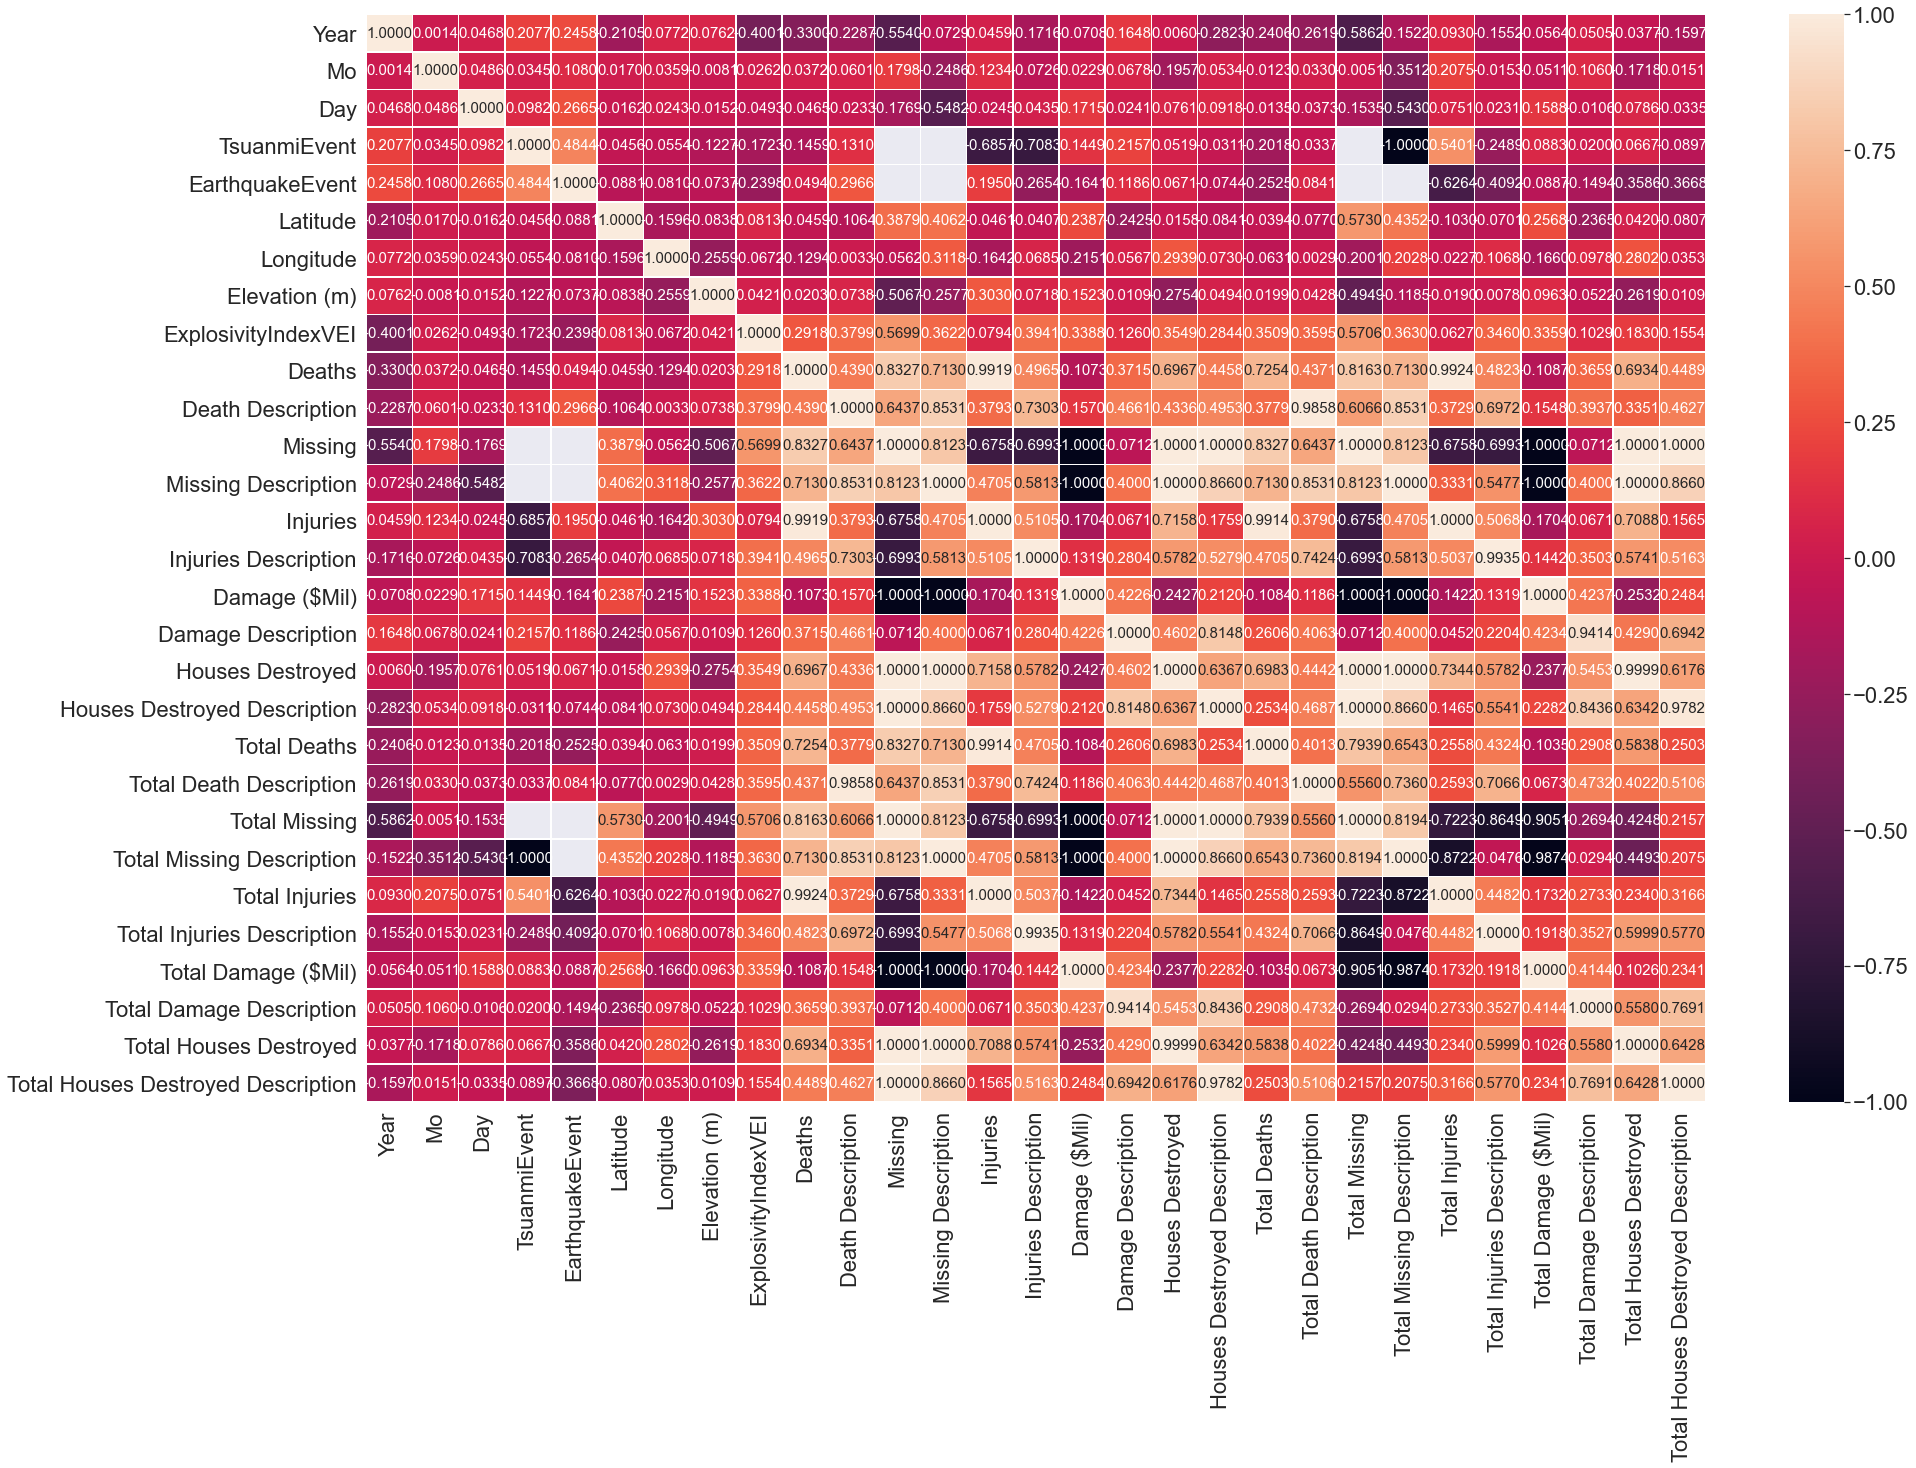

In [10]:
plt.rcParams['figure.figsize'] = (30.0, 20.0)
sns.set(font_scale=2)
ax = sns.heatmap(corr, annot=True, fmt='.4f', linewidths=.5, 
                 annot_kws={'size': 15})

In [13]:
#key_vars = ['Type', 'Name', 'Deaths', 'ExplosivityIndexVEI', 'EarthquakeEvent']

# import the StandardScaler
#from sklearn.preprocessing import StandardScaler

# extract out the numerical data and scale it to zero mean and unit standard deviation
#X = vdf[key_vars]
#scaler = StandardScaler().fit(X)
#X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns, index = X.index)


In [14]:
#k = vdf['Type'].nunique()
#from sklearn.cluster import KMeans
#kcluster = KMeans(n_clusters=k).fit(X_scaled)

# Predicting 
Activity By Volcano as it correlates with explositivity and earthquakes

In [34]:
all_inputs = vdf[['TsuanmiEvent','ExplosivityIndexVEI', 'EarthquakeEvent']].values

all_labels = vdf['TsuanmiEvent'].values

all_inputs[:2]

array([[21.,  3., nan],
       [nan,  6., nan]])

In [35]:
# Train and split the data
X_train, X_test, y_train, y_test = train_test_split(all_inputs, 
                                                    all_labels, 
                                                    test_size= 0.2, 
                                                    random_state=42)

In [36]:
X_train[:1]

array([[nan,  2., nan]])

In [37]:
decision_tree_classifier.fit(X_train, y_train)
decision_tree_classifier.score(X_test, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').